<a href="https://colab.research.google.com/github/VabaLaba/VabaLaba/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22a1_task_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

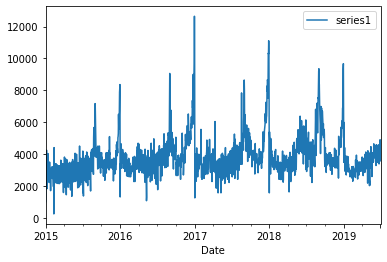

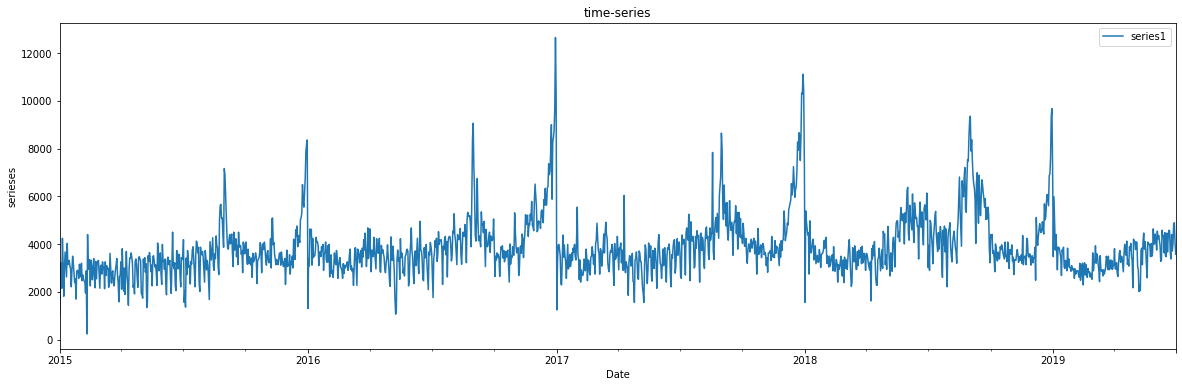

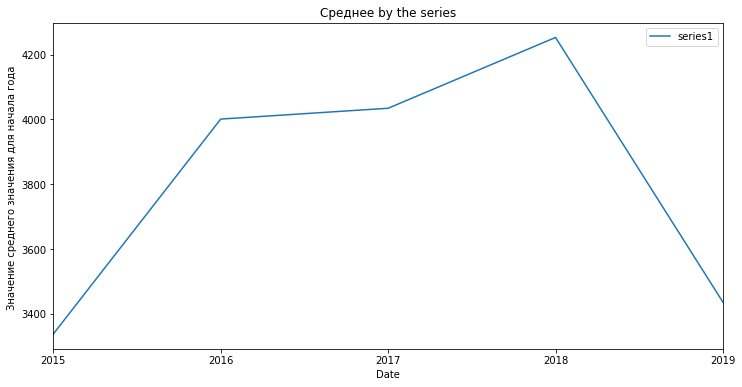

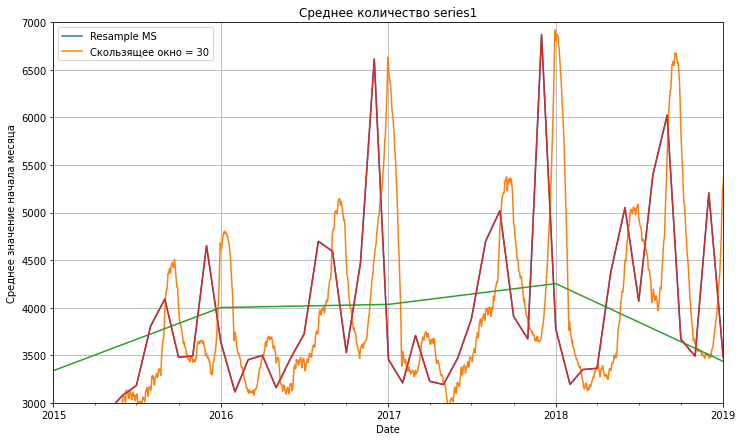

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math
import statsmodels.api as sm 
import datetime
import itertools
 
 
 
from random import random
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from pylab import rcParams
 
 
from sklearn import model_selection 
# contrived dataset
 
df_train=pd.read_excel('data_abonents.xls',index_col='Date')
 
df_train.head()
 
df_train.index
 
# df_train.set_index('Date')
 
df_train.index = pd.to_datetime(df_train.index)
df_train.index
 
df_train.loc['2015-01-01':'2017-01-01']
 
df_train.shape
 
df_train.resample(rule='AS').mean().head()
 
df_train.plot()
 
ax = df_train.plot (figsize = (20,6)) 
ax.set (title = 'time-series', ylabel = 'serieses')
 
ax = df_train.resample (rule = 'AS'). mean (). plot (figsize = (12,6))
ax.set (title = 'Среднее by the series', ylabel = 'Значение среднего значения для начала года ')
 
ax = df_train.resample (rule = 'AS'). mean (). plot.bar (figsize = (12,6)) 
ax.set (title = 'Среднее количество ', ylabel = 'Значение среднего начального года ')
 
ax = df_train['series1']. resample (rule = 'MS'). mean (). plot (figsize = (15,8), label = 'Resample MS') 
ax.autoscale (tight = True) 
df_train.rolling (window = 30) .mean () ['series1']. plot (label = 'Скользящее окно = 30') 
 
ax.set (ylabel = 'Среднее значение начала месяца', title = 'Среднее количество series1' ) 
ax.legend ()
 
ax = df_train['series1']. resample (rule = 'AS'). mean (). plot (xlim = ["2015-01-01", "2019-01-01"], ylim = [3000,7000 ], figsize = (12,7)) 
ax.yaxis.grid (True) 
ax.xaxis.grid (True)
 
ax = df_train['series1']. resample (rule = 'M ').  mean(). plot (xlim = ["2015-01-01", "2019-01-01"], ylim = [3000,7000 ], figsize = (12,7)) 
ax.yaxis.grid (True) 
ax.xaxis.grid (True)
 
train_data = df_train[:1442]
test_data = df_train[1442:]
# тренировочная выборка и тестовая выборка 
 
scaler = MinMaxScaler(feature_range = (0, 1))
 
apple_training_scaled = scaler.fit_transform(train_data)
apple_test_scaled=scaler.fit_transform(test_data)

разБить датасет на обучающую и тестовую выборки 

In [ ]:
features_set = []
labels = []
start_step_training=60
size_of_df_train=len(apple_training_scaled)
end_step_training=len(apple_training_scaled)-100
count_examples = end_step_training - start_step_training

print(f'{count_examples} - count of training of examples')

for i in range(start_step_training, end_step_training):
    features_set.append(apple_training_scaled[i-start_step_training:i, 0])
    labels.append(apple_training_scaled[i-start_step_training:i, 0])

features_set, labels = np.array(features_set), np.array(labels)
features_set = features_set.reshape(-1,1)
labels=labels.reshape(-1,1)
labels= scaler.transform(labels)
features_set = scaler.transform(features_set)


1282 - count of training of examples


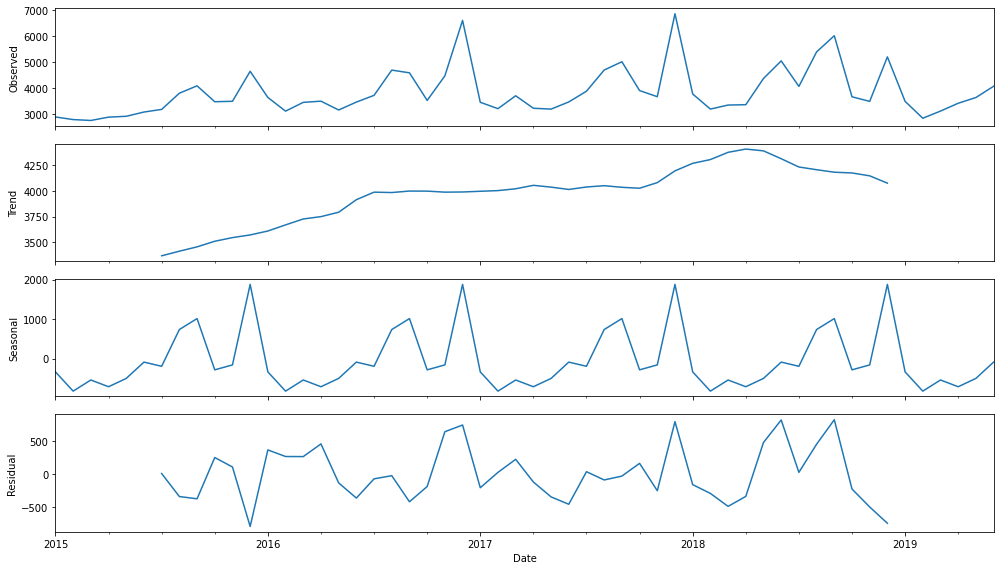

In [ ]:
rcParams['figure.figsize'] = 14, 8
y=df_train['series1'].resample('MS').mean()
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
list(itertools.product(p, d, q))

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,series=param,seasonal=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()                            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:893.6858600595629
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:893.6858600595629
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:893.6858600595629
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:893.6858600595629
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:893.6858600595629
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:893.6858600595629
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:893.6858600595629
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:893.6858600595629
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:893.6858600595629
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:893.6858600595629
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:893.6858600595629
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:893.6858600595629
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:893.6858600595629
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:893.6858600595629
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:893.6858600595629
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:893.6858600595629
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:893.6858600595629
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:893.6858600595629
ARIMA(0, 1

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                series=(1, 1, 1),
                                seasonal=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9679      0.030     32.392      0.000       0.909       1.026
sigma2      1.142e+06   1.62e+05      7.045      0.000    8.25e+05    1.46e+06


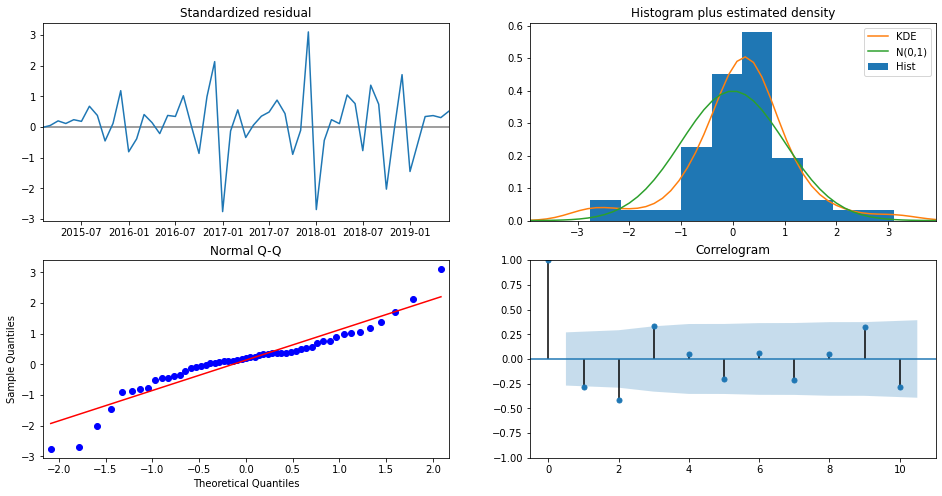

In [ ]:
results.plot_diagnostics (figsize = (16, 8)) 
plt.show ()

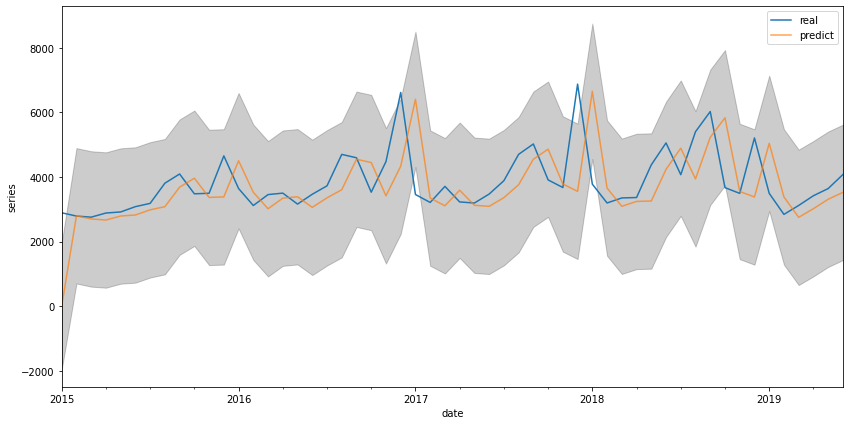

In [ ]:
pred = results.get_prediction (start = pd.to_datetime ('2015-01-01'), dynamic = False) 
pred_ci = pred.conf_int ()
ax = y ['2015':]. plot (label = 'real') 
pred.predicted_mean.plot (ax = ax, label = 'predict', alpha = .7, figsize = (14, 7) )
ax.fill_between (pred_ci.index, 
                pred_ci.iloc [:, 0], 
                pred_ci.iloc [:, 1], color = 'k', alpha = .2)
ax.set_xlabel ('date') 
ax.set_ylabel ('series') 
plt.legend ()
plt.show ()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 565945.64


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 752.29


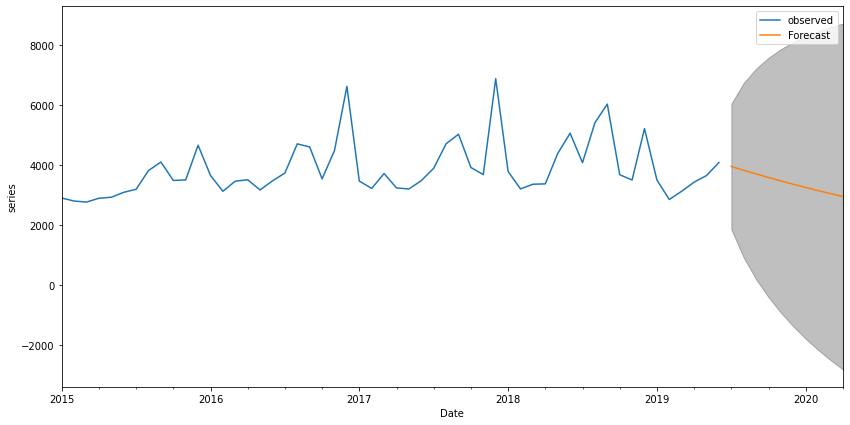

In [ ]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('series')
plt.legend()
plt.show()

In [ ]:
# regressor = Sequential()

# regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (features_set.shape[1], 1)))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 50,return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(Dense(units = 90))

# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# regressor.fit(features_set, labels, epochs = 100, batch_size = 32)



# inputs = apple_training_scaled[len(apple_training_scaled)  - 60:]
# inputs = inputs.reshape(-1,1)
# inputs = scaler.transform(inputs)
# X_test = []
# for i in range(end_step_training,size_of_df_train):
#     X_test.append(apple_training_scaled[i-start_step_training:i, 0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



In [ ]:
# model = Sequential()